## 1. Baseline Network Comparison
---

- This project is interested with understanding the differences that arise in the learning behavior of both non-differentially private, and differentially private image classification models. 
- In order to observe differences in patterns of behavior, we must decide on a model to serve as a comparative basis for experiments conducted training differentially private model. We selected to begin with AlexNet, a  well known and researched CNN. Pytorch provides implementations of the network that allow for easy training of the network with available data.
- AlexNets are eight layered convolutional neural networks, containing five convolutional layers some with max pooling layers, and three final fully connected layers. 
- Currently, we have two AlexNets trained for both the CIFAR10, and MNIST datasets. Each dataset has a corresponding AlexNet that is both differentially private, and non-differentially private.

## 2. What Do Networks Learn?


- Understanding what a model is learning contributes to the model's overall interpretability. If certain classification models are particularly interpretable, and the model handles sensitive information, it is reasonable to suggest the model is susceptible to particular types of knowledge engineering attacks, or insights that detract from the privacy of the data.
- But what does a network actually learn? Neural Networks in a sense look to minimize a cost function with respect to the network's weights.
- Although this seems unintuitive, there are actually a number of techniques that have been produced that present some interesting visualizations of what a network is learning. Often, we cam examine gradients or neuron activity to provide these visualizations.
- Utku Ozbulak published implementations of several of these techniques. The techniques mentioned in the sections below are modifications of implementations published in the repo: https://github.com/utkuozbulak/pytorch-cnn-visualizations.git

In [1]:
%pylab inline

import pickle
import sys
import os
import sys
sys.path.insert(0, os.path.abspath('../cnn_visualizations'))
import vanilla_backprop
import generate_class_specific_samples
import torch

Populating the interactive namespace from numpy and matplotlib


One technique for visualizing what a neural network has learned, is to examine the gradients produced for some test image. We'll go ahead and try this on a couple test samples...

using:mnist
../trained_models/mnist_alexnet.pth
trained model exists, loading model
model loaded, forwarding examples


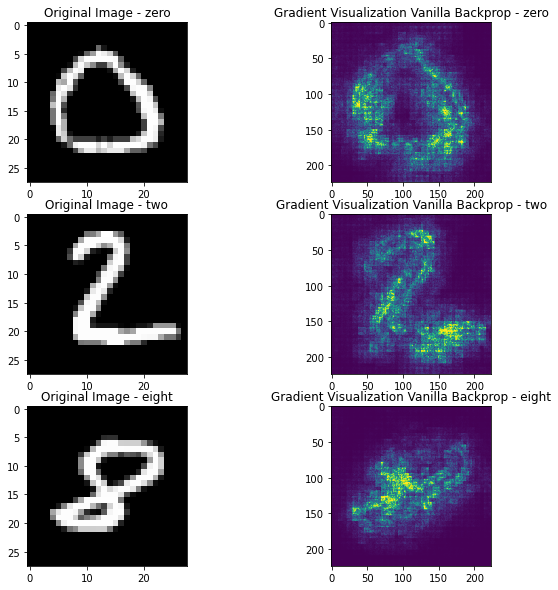

Vanilla backprop completed


In [2]:
train=False
dataset='mnist'
modeltype='alex'
dp=False
vanilla_backprop.vanilla_backprop_example(train,dataset,modeltype,dp)

We can see that our gradients actually visualize pretty nice, however, this is a bit contrary to the notion of differential privacy. Ie., the predictions produced by the network, should not provide insight to an observer about the class of the test object. These are relatively simple examples and image subjects. Furthermore, the images are pretty small, and the samples aren't very noisy. What happens if we were to take a look at a dataset with less simple images?

using other:cifar
Files already downloaded and verified
Files already downloaded and verified
../trained_models/cifar_alexnet.pth
trained model exists, loading model
model loaded, forwarding examples


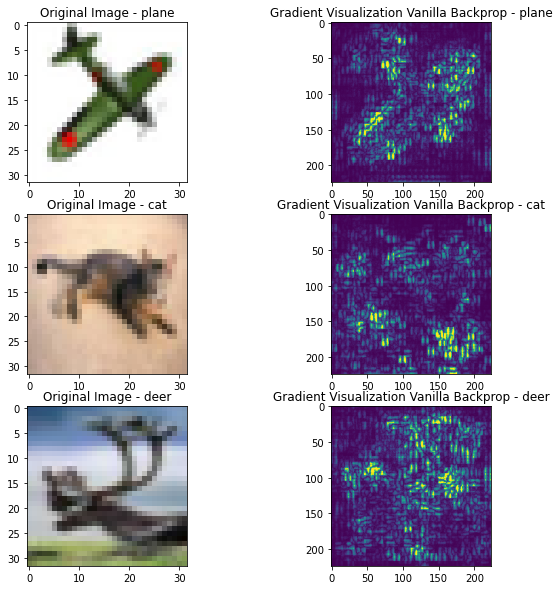

Vanilla backprop completed


In [3]:
train=False
dataset='cifar'
modeltype='alex'
dp=False
vanilla_backprop.vanilla_backprop_example(train,dataset,modeltype,dp)

We can see that the gradient visualizations for these images are not quite as clear to an observer. However, careful examination of the gradient visualization shows these graidents contain traces of the input image. Although not as pronounced as the MNIST dataset, it is clear that there is still information that can be inferred from visualizing the prediction output of the network. This suggests that our model might not be learning in a way that we could consider to be differentially private.

## 3. What Can Be Done?


How do we train a network in such a way that we are minimizing the model's interpretability in these kinds of visualizations? Lets see what happens when we examine the same sample images on a DP trained network.

using other:cifar
Files already downloaded and verified
Files already downloaded and verified
../trained_models/cifar_alex_dp_net.pth
trained model exists, loading model
model loaded, forwarding examples


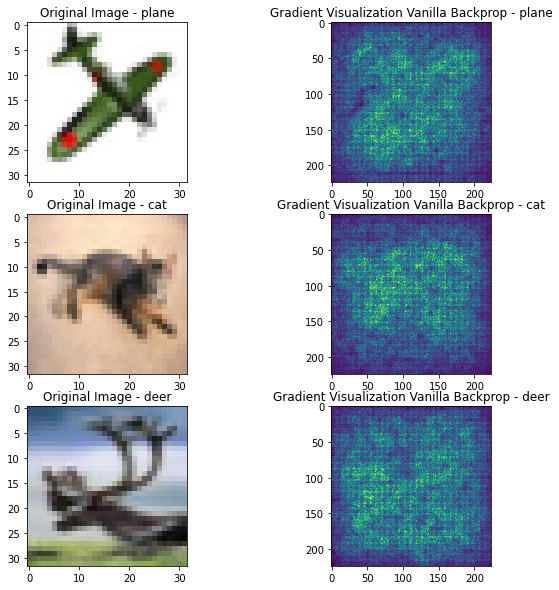

Vanilla backprop completed


In [5]:
train=False
dataset='cifar'
modeltype='alex'
dp=True
vanilla_backprop.vanilla_backprop_example(train,dataset,modeltype,dp)

There are a couple things to notice. It appears the gradients being visualized still portray some elements of the corresponding class of the test image, however in this case there seems to be some obfuscation to these gradients. This is where the differential privacy is coming into play. Opacus obfuscates the gradients being produced for each example. However, certain visualization techniques can be more or less suscepitble to this obfucscation. Opacus is an open source tool, and also presents a research objective for this project. Understanding how opacus influences the process of training a model, will provide some understanding for how the model produces classifications. Are certain models more or less inclined to be differentially private?

Another visualization method entail performing a gradient ascent to maximize activity for some specific class in observed in a test image across the weights produced during training. Using the MNIST images as above we get the following visualizations...
NOTE: this operation may take a few seconds

using:mnist
../trained_models/mnist_alexnet.pth
trained model exists, loading model


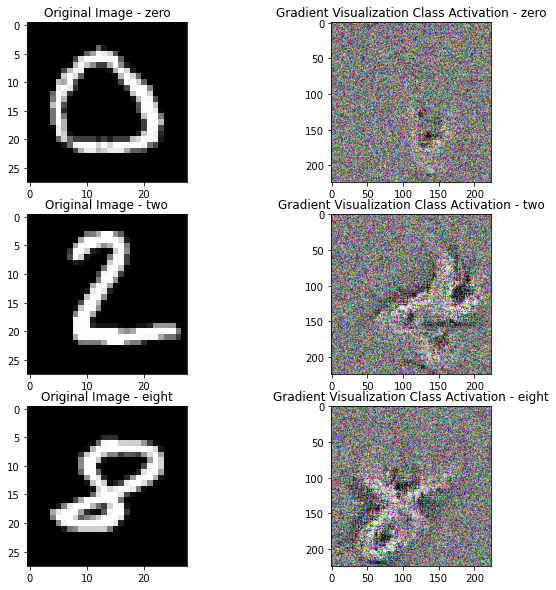

In [6]:
train=False
dataset='mnist'
modeltype='alex'
dp=False
generate_class_specific_samples.class_act_example(train,dataset,modeltype,dp)

It still appears as though our visualizations are again tending away from the notion of differential privacy. We are still able to see interpretable visual elements of the predicted classification. 

In [ ]:
train=False
dataset='mnist'
modeltype='alex'
dp=True
generate_class_specific_samples.class_act_example(train,dataset,modeltype,dp)

using:mnist
../trained_models/mnist_alex_dp_net.pth
trained model exists, loading model


Interesting result. It seems as though this visualization doesn't seem to present anything particularly meaningful. Does this mean differential privacy has or has not been achieved? No not neccesarily. It seems the application of differential privacy mechanisms on this model and visualization technique have reduced the interpretability of the prediction, but at a cost in performance, and at the time of writing this notebook, a reduction in accuracy of the classifications made by the model. There are a number of techniques that have been developed for examining features a network is learning. Some of these techniques lend themselves better to the various ways different networks tend to learn, and as such, different visualzations result from the same techniques on the same models. Moving forward, we intend to investigate different image classification models, as well as the effects of applying differential privacy mechanism have on the resulting visualiztions produced by techniques such as the ones demontrated above, as well as existing techniques not currently implemented in this notebook.